DataRegularisation code examples
--------------------------------
Here we find all code examples from
[https://rdm-software.pages.ufz.de/saqc/cookbooks/DataRegularisation.html]()


In [6]:
import pandas as pd
data_path = 'https://git.ufz.de/rdm-software/saqc/-/raw/develop/docs/resources/data/SoilMoisture.csv'
data = pd.read_csv(data_path, index_col=0)
data.index = pd.DatetimeIndex(data.index)

SoilMoisture
2021-01-01 00:09:07     23.429701
2021-01-01 00:18:55     23.431900
2021-01-01 00:28:42     23.343100
2021-01-01 00:38:30     23.476400
2021-01-01 00:48:18     23.343100
...                           ...
2021-03-20 07:13:49    152.883102
2021-03-20 07:26:16    156.587906
2021-03-20 07:40:37    166.146194
2021-03-20 07:54:59    164.690598
2021-03-20 08:40:41    155.318893

[10607 rows x 1 columns]

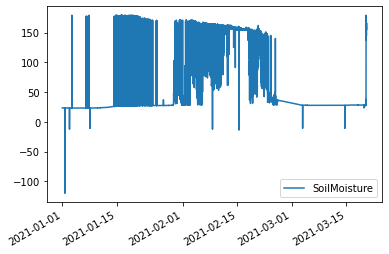

In [9]:
data.plot()
data

Shift
-----

In [15]:
import saqc
orig = saqc.SaQC(data)
qc = orig.shift('SoilMoisture', target='SoilMoisture_bshift', freq='10min', method='bshift')
qc.data

                    SoilMoisture |                     SoilMoisture_bshift | 
================================ | ======================================= | 
2021-01-01 00:09:07    23.429701 | 2021-01-01 00:00:00           23.429701 | 
2021-01-01 00:18:55    23.431900 | 2021-01-01 00:10:00           23.431900 | 
2021-01-01 00:28:42    23.343100 | 2021-01-01 00:20:00           23.343100 | 
2021-01-01 00:38:30    23.476400 | 2021-01-01 00:30:00           23.476400 | 
2021-01-01 00:48:18    23.343100 | 2021-01-01 00:40:00           23.343100 | 
...                          ... | ...                                 ... | 
2021-03-20 07:13:49   152.883102 | 2021-03-20 08:10:00                 NaN | 
2021-03-20 07:26:16   156.587906 | 2021-03-20 08:20:00                 NaN | 
2021-03-20 07:40:37   166.146194 | 2021-03-20 08:30:00                 NaN | 
2021-03-20 07:54:59   164.690598 | 2021-03-20 08:40:00          155.318893 | 
2021-03-20 08:40:41   155.318893 | 2021-03-20 08:50:00          

Minimize Shifting Distance
--------------------------

In [16]:
qc = orig.shift('SoilMoisture', target='SoilMoisture_nshift', freq='10min', method='nshift')
qc.data['2021-01-01T07:00:00':'2021-01-01T08:00:00']

                    SoilMoisture |                     SoilMoisture_nshift | 
================================ | ======================================= | 
2021-01-01 07:00:41      23.3431 | 2021-01-01 07:00:00             23.3431 | 
2021-01-01 07:10:29      23.3431 | 2021-01-01 07:10:00             23.3431 | 
2021-01-01 07:20:17      23.2988 | 2021-01-01 07:20:00             23.2988 | 
2021-01-01 07:30:05      23.3874 | 2021-01-01 07:30:00             23.3874 | 
2021-01-01 07:39:53      23.3853 | 2021-01-01 07:40:00             23.3853 | 
2021-01-01 07:49:41      23.3431 | 2021-01-01 07:50:00             23.3431 | 
2021-01-01 07:59:29      23.3874 | 2021-01-01 08:00:00             23.3874 | 

In [17]:
qc.data['2021-03-20 07:00:00':]

                    SoilMoisture |                     SoilMoisture_nshift | 
================================ | ======================================= | 
2021-03-20 07:13:49   152.883102 | 2021-03-20 07:00:00          145.027496 | 
2021-03-20 07:26:16   156.587906 | 2021-03-20 07:10:00          152.883102 | 
2021-03-20 07:40:37   166.146194 | 2021-03-20 07:20:00                 NaN | 
2021-03-20 07:54:59   164.690598 | 2021-03-20 07:30:00          156.587906 | 
2021-03-20 08:40:41   155.318893 | 2021-03-20 07:40:00          166.146194 | 
                                 | 2021-03-20 07:50:00          164.690598 | 
                                 | 2021-03-20 08:00:00                 NaN | 
                                 | 2021-03-20 08:10:00                 NaN | 
                                 | 2021-03-20 08:20:00                 NaN | 
                                 | 2021-03-20 08:30:00                 NaN | 
                                 | 2021-03-20 08:40:00          

Aggregation
-----------

In [18]:
import numpy as np
qc = orig.resample('SoilMoisture', target='SoilMoisture_mean', freq='20min', method='bagg', func=np.mean)
qc.data

                    SoilMoisture |                     SoilMoisture_mean | 
================================ | ===================================== | 
2021-01-01 00:09:07    23.429701 | 2021-01-01 00:00:00         23.430800 | 
2021-01-01 00:18:55    23.431900 | 2021-01-01 00:20:00         23.409750 | 
2021-01-01 00:28:42    23.343100 | 2021-01-01 00:40:00         23.320950 | 
2021-01-01 00:38:30    23.476400 | 2021-01-01 01:00:00         23.365250 | 
2021-01-01 00:48:18    23.343100 | 2021-01-01 01:20:00         23.320950 | 
...                          ... | ...                               ... | 
2021-03-20 07:13:49   152.883102 | 2021-03-20 07:20:00        156.587906 | 
2021-03-20 07:26:16   156.587906 | 2021-03-20 07:40:00        165.418396 | 
2021-03-20 07:40:37   166.146194 | 2021-03-20 08:00:00               NaN | 
2021-03-20 07:54:59   164.690598 | 2021-03-20 08:20:00               NaN | 
2021-03-20 08:40:41   155.318893 | 2021-03-20 08:40:00        155.318893 | 
[10607]     

Interpolation
-------------

In [ ]:
qc = qc.interpolate('SoilMoisture', target='SoilMoisture_linear', freq='10min', method='time')
qc.data

Flags and Regularisation
------------------------

In [20]:
qc = qc.linear('SoilMoisture', target='SoilMoisture_linear', freq='10min')
qc.data['2021-01-01 15:00:00':'2021-01-01 16:00:00']

                    SoilMoisture |                     SoilMoisture_mean |                     SoilMoisture_linear | 
================================ | ===================================== | ======================================= | 
2021-01-01 15:00:51      23.3410 | 2021-01-01 15:00:00          23.34205 | 2021-01-01 15:00:00           23.341182 | 
2021-01-01 15:10:38      23.3431 | 2021-01-01 15:20:00          23.34100 | 2021-01-01 15:10:00           23.342964 | 
2021-01-01 15:20:26      23.3410 | 2021-01-01 15:40:00         -24.45270 | 2021-01-01 15:20:00           23.341092 | 
2021-01-01 15:30:14      23.3410 | 2021-01-01 16:00:00          23.34310 | 2021-01-01 15:30:00           23.341000 | 
2021-01-01 15:40:02    -120.0000 |                                       | 2021-01-01 15:40:00         -119.512446 | 
2021-01-01 15:49:50      23.2988 |                                       | 2021-01-01 15:50:00           23.299553 | 
2021-01-01 15:59:38      23.3431 |                      

In [ ]:
qc = qc.flagRange('SoilMoisture', min=0)
qc = qc.interpolate('SoilMoisture', freq='10min', method='time')
qc.data['2021-01-01T07:00:00':'2021-01-01T08:00:00']